# Table of Contents¶
1. Import libraries
2. Import and prepare data set
3. Exclude low-activity customers
4. Create customer profiles
5. Analyze customer profiles
6. Analyze customer profiles across regions and departments

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Import and prepare data set

In [2]:
# Define path
path = r'/Users/elisabetta/Documents/12-2022 Instacart Basket Analysis'

In [3]:
# Import latest file
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# For privacy reasons, drop first_name and second_name columns. Customers will still be identifiable via their unique user_id

# Drop column first_name
df_ords_prods_custs = df_ords_prods_custs.drop(columns = ['first_name'])

# Drop column second_name
df_ords_prods_custs = df_ords_prods_custs.drop(columns = ['second_name'])

In [6]:
# Check output
df_ords_prods_custs.shape

(32404854, 22)

# 3. Exclude low-activity customers

In [7]:
# Use .loc() method to create ecxlusion flag

In [8]:
df_ords_prods_custs.loc[df_ords_prods_custs['number_of_orders'] < 5, 'active_status'] = 'Low activity'

In [9]:
df_ords_prods_custs.loc[df_ords_prods_custs['number_of_orders'] >= 5, 'active_status'] = 'High activity'

In [10]:
# Check values in new column active_status
df_ords_prods_custs['active_status'].value_counts(dropna = False)

High activity    24414877
Low activity      7989977
Name: active_status, dtype: int64

In [11]:
# Drop low activity customers
df_ords_prods_custs = df_ords_prods_custs[df_ords_prods_custs.active_status != 'Low activity']

In [12]:
# Check output
df_ords_prods_custs['active_status'].value_counts(dropna = False)

High activity    24414877
Name: active_status, dtype: int64

In [13]:
df_ords_prods_custs.shape

(24414877, 23)

# 4. Create customer profiles

In [15]:
# Check values in column n_dependants
df_ords_prods_custs['n_dependants'].value_counts(dropna = False)

3    6133537
0    6105002
2    6094231
1    6082107
Name: n_dependants, dtype: int64

In [16]:
# Create customer profile flag
cust_prof_for = []
for value in df_ords_prods_custs['n_dependants']:
    if value == 0 :
        cust_prof_for.append('Single')
    elif value == 1  :
        cust_prof_for.append('Couple')
    else:
        cust_prof_for.append('With children')

In [17]:
# Put output in new column cust_prof
df_ords_prods_custs['cust_prof'] = cust_prof_for

In [18]:
# Check output
df_ords_prods_custs['cust_prof'].value_counts(dropna = False)

With children    12227768
Single            6105002
Couple            6082107
Name: cust_prof, dtype: int64

In [19]:
df_ords_prods_custs.shape

(24414877, 24)

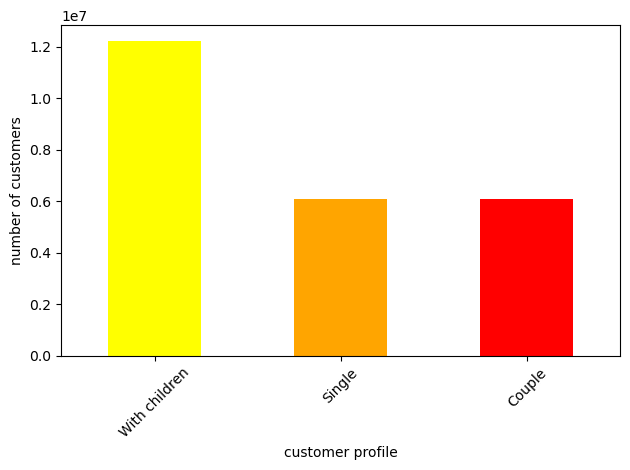

In [20]:
# Create a visualization of the distribution of the customer profiles
bar_distr_cust_prof = df_ords_prods_custs['cust_prof'].value_counts().plot.bar(color = ['yellow', 'orange', 'red'])
plt.xlabel('customer profile')
plt.ylabel('number of customers')
plt.xticks (rotation = 45)
plt.tight_layout()

In [21]:
# Export bar chart
bar_distr_cust_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_distr_cust_prof_4.10.png'))

# 5. Analyze customer profiles

In [24]:
# Aggregate the max, mean, and min on customer profile for spend
df_cust_prof_agg_spend = df_ords_prods_custs.groupby('cust_prof')['price'].agg(['max', 'min', 'mean'])

In [25]:
df_cust_prof_agg_spend

,max,min,mean
cust_prof,,,
Couple,99999.0,1.0,11.510665
Single,99999.0,1.0,12.029888
With children,99999.0,1.0,11.885824


In [26]:
# Aggregate the max, mean, and min on customer profile for number of orders
df_cust_prof_agg_n_ords = df_ords_prods_custs.groupby('cust_prof')['number_of_orders'].agg(['max', 'min', 'mean'])

In [27]:
df_cust_prof_agg_n_ords

,max,min,mean
cust_prof,,,
Couple,99,5,21.911415
Single,99,5,22.099175
With children,99,5,21.894506


# 6. Analyze customer profiles across regions and departments

In [28]:
# How does family structure (customer profile) vary across regions?

In [40]:
# Create region flag
regions_for = []
for value in df_ords_prods_custs['state']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        regions_for.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        regions_for.append('Midwest')
    elif value == '' or value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
        regions_for.append('South')
    elif value == '' or value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        regions_for.append('West')
    else:
        regions_for.append('No data')

In [41]:
# Put output in new column region
df_ords_prods_custs['region'] = regions_for

In [42]:
# Check output
df_ords_prods_custs['region'].value_counts(dropna = False)

South        8129086
West         6258764
Midwest      5711756
Northeast    4315271
Name: region, dtype: int64

In [44]:
# Pivot region and customer profile via crosstab
region_cust_prof = pd.crosstab(df_ords_prods_custs['region'], df_ords_prods_custs['cust_prof'], dropna = False)

In [45]:
region_cust_prof

cust_prof,Couple,Single,With children
region,,,
Midwest,1454448,1436961,2820347
Northeast,1087111,1065138,2163022
South,1997852,2038334,4092900
West,1542696,1564569,3151499


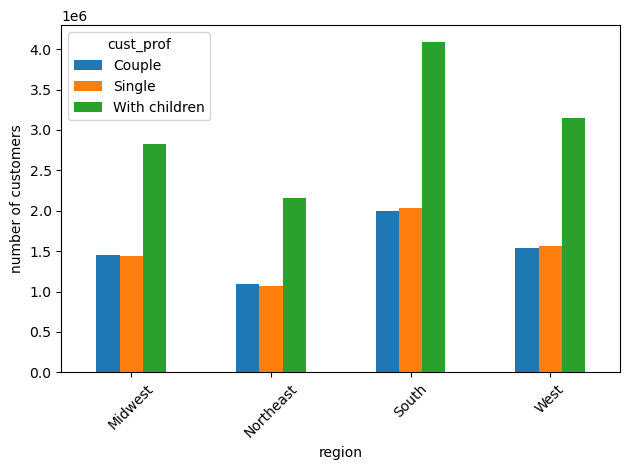

In [60]:
# Create bar chart from crosstab
bar_region_cust_prof = region_cust_prof.plot(kind = 'bar')
plt.xlabel('region')
plt.ylabel('number of customers')
plt.xticks (rotation = 45)
plt.tight_layout()

In [61]:
# Export chart
bar_region_cust_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_cust_prof_4.10.png'))

In [55]:
# How does family structure (customer profile) influence buying habits?

In [56]:
# Pivot customer profile and departments via crosstab
cust_prof_dept = pd.crosstab(df_ords_prods_custs['cust_prof'], df_ords_prods_custs['department_id'], dropna = False)

In [57]:
cust_prof_dept

department_id,1,10,11,12,13,14,15,16,17,18,...,2,20,21,3,4,5,6,7,8,9
cust_prof,,,,,,,,,,,,,,,,,,,,,
Couple,402510,7098,81775,131161,345666,132532,196987,1033153,135152,81526,...,6867,193050,14195,220794,1797255,26720,50179,505134,18298,157908
Single,405513,6585,82361,128206,345318,130160,195449,1030238,132159,84313,...,6935,197994,14132,221599,1812885,27959,50038,512055,18250,157414
With children,819591,13875,164344,264523,694391,262253,395354,2057097,272038,170108,...,13364,391967,29240,440937,3616951,53293,97683,1019258,35563,318403


In [79]:
cust_prof_dept.to_clipboard()

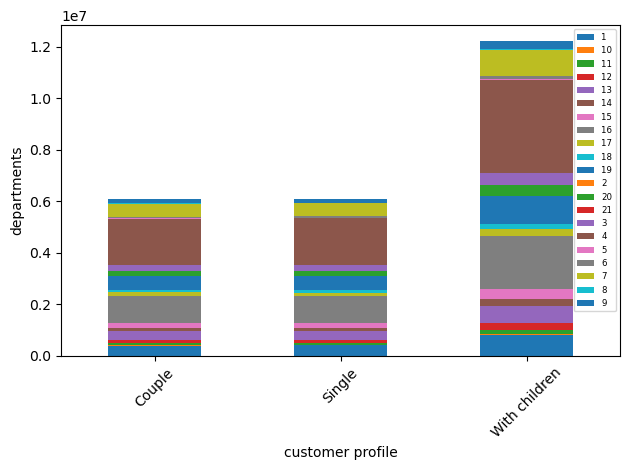

In [78]:
# Create bar chart from crosstab
bar_cust_prof_dept = cust_prof_dept.plot(kind = 'bar', stacked = True)
plt.xlabel('customer profile')
plt.ylabel('departments')
plt.legend(loc='best', fontsize = 6.2)
plt.xticks (rotation = 45)
plt.tight_layout()

In [80]:
# Export chart
bar_cust_prof_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cust_prof_dept_4.10.png'))